In [38]:
!pip install numpy 
!pip install pandas 


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [40]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)  # Show max 50 rows

df = pd.read_csv('train_heart.csv')
df

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,629995,56,0,1,110,226,0,0,132,0,0.0,1,0,7,Absence
629996,629996,54,1,4,128,249,1,2,150,0,0.0,2,0,3,Absence
629997,629997,67,1,4,130,275,0,0,149,0,0.0,1,2,7,Presence
629998,629998,52,1,4,140,199,0,2,157,0,0.0,1,0,6,Presence


In [41]:
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Numer of columns: {df.shape[1]}")

Dataset shape: (630000, 15)
Number of rows: 630000
Numer of columns: 15


In [42]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Heart Disease  

In [43]:
df.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [44]:
print("Missing values per column: ")
print(df.isnull().sum())
print(f"\ntotal missing values: {df.isnull().sum().sum()}")

Missing values per column: 
id                         0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

total missing values: 0


In [45]:
df.describe()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,0.716028,1.455871,0.451040,4.618873
std,181865.479132,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,0.948472,0.545192,0.798549,1.950007
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,157499.750000,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,314999.500000,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.000000,3.000000
75%,472499.250000,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000
max,629999.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [46]:
print(df['Heart Disease'].value_counts())
print("\nPercentage distribution: ")
print(df['Heart Disease'].value_counts(normalize=True) * 100)

Heart Disease
Absence     347546
Presence    282454
Name: count, dtype: int64

Percentage distribution: 
Heart Disease
Absence     55.166032
Presence    44.833968
Name: proportion, dtype: float64


# Exploratory Data Analysis 

In [47]:
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [49]:
print("All columns : ")
print(df.columns.tolist())

All columns : 
['id', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']


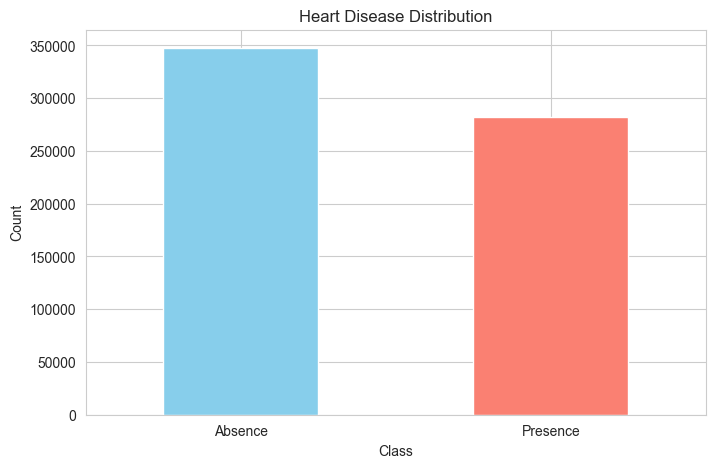


Value counrts: 
Heart Disease
Absence     347546
Presence    282454
Name: count, dtype: int64

Percentage distribution: 
Heart Disease
Absence     55.166032
Presence    44.833968
Name: proportion, dtype: float64


In [50]:
target_col = 'Heart Disease'
plt.figure(figsize=(8,5))
df[target_col].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Heart Disease Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print("\nValue counrts: ")
print(df[target_col].value_counts())
print("\nPercentage distribution: ")
print(df[target_col].value_counts(normalize=True) * 100)

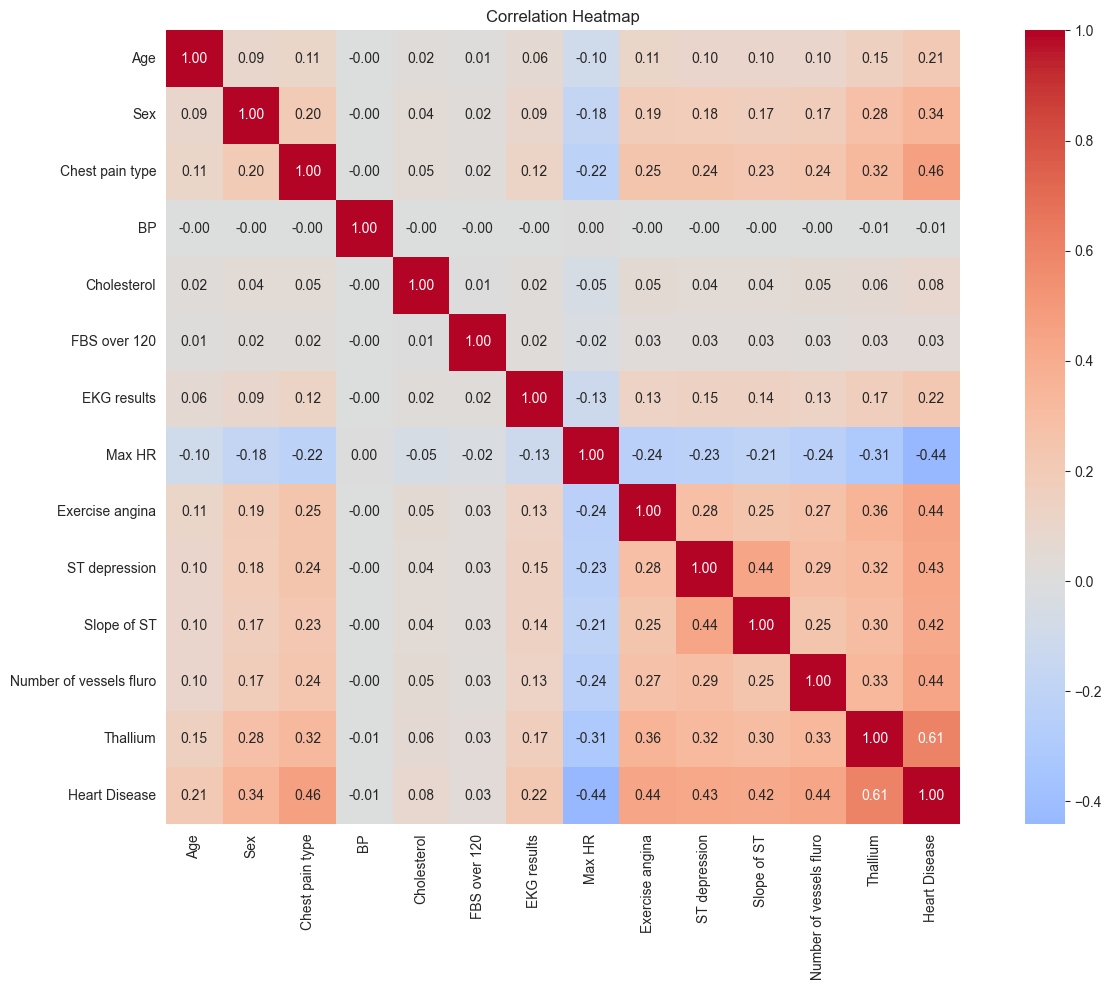

In [51]:
df_corr= df.copy()
df_corr[target_col] = df_corr[target_col].map({'Presence': 1, 'Absence': 0})
plt.figure(figsize=(14,10))
correlation_matrix = df_corr.drop('id',axis=1).corr()
sns.heatmap(correlation_matrix,annot=True, fmt=".2f", cmap='coolwarm',center=0,square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

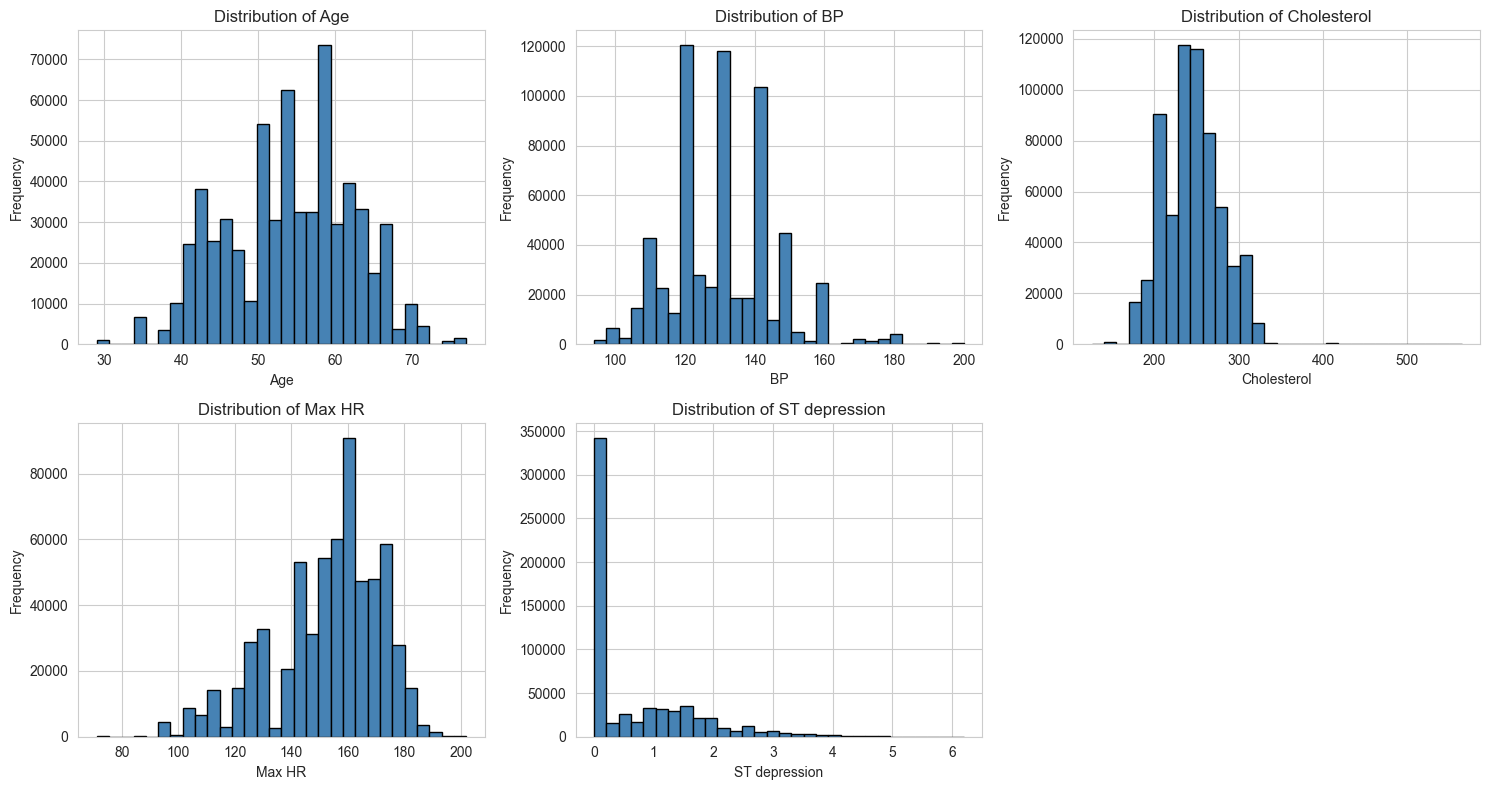

In [52]:
numerical_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    df[col].hist(bins=30, ax=axes[i], edgecolor='black', color='steelblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

axes[-1].axis('off')
plt.tight_layout()
plt.show()

In [53]:
df[target_col] = df[target_col].map({'Presence': 1, 'Absence': 0})

print("target variable after encoding :")
print(df[target_col].value_counts())

target variable after encoding :
Heart Disease
0    347546
1    282454
Name: count, dtype: int64


In [54]:
X = df.drop(['id','Heart Disease'], axis=1)
y = df[target_col]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (630000, 13)
Target shape: (630000,)


## Feature Engineering - Creating Advanced Features

In [55]:
def create_advanced_features(df_input):
    """
    Create interaction and polynomial features to boost model performance
    """
    df_feat = df_input.copy()
    
    # 1. Age-based risk groups
    df_feat['Age_Group'] = pd.cut(df_feat['Age'], bins=[0, 40, 50, 60, 100], labels=[0, 1, 2, 3])
    df_feat['Age_Group'] = df_feat['Age_Group'].cat.add_categories([-1]).fillna(-1).astype(int)
    
    # 2. Cholesterol risk levels (AHA guidelines)
    df_feat['Chol_Risk'] = pd.cut(df_feat['Cholesterol'], bins=[0, 200, 240, 999], labels=[0, 1, 2])
    df_feat['Chol_Risk'] = df_feat['Chol_Risk'].cat.add_categories([-1]).fillna(-1).astype(int)
    
    # 3. BP risk levels
    df_feat['BP_Risk'] = pd.cut(df_feat['BP'], bins=[0, 120, 140, 999], labels=[0, 1, 2])
    df_feat['BP_Risk'] = df_feat['BP_Risk'].cat.add_categories([-1]).fillna(-1).astype(int)
    
    # 4. Key interaction features
    df_feat['Age_x_Cholesterol'] = df_feat['Age'] * df_feat['Cholesterol']
    df_feat['Age_x_BP'] = df_feat['Age'] * df_feat['BP']
    df_feat['Age_x_MaxHR'] = df_feat['Age'] * df_feat['Max HR']
    df_feat['Cholesterol_x_BP'] = df_feat['Cholesterol'] * df_feat['BP']
    df_feat['ST_x_Slope'] = df_feat['ST depression'] * df_feat['Slope of ST']
    df_feat['ST_x_Vessels'] = df_feat['ST depression'] * df_feat['Number of vessels fluro']
    
    # 5. Polynomial features for key variables
    df_feat['Age_squared'] = df_feat['Age'] ** 2
    df_feat['MaxHR_squared'] = df_feat['Max HR'] ** 2
    df_feat['ST_depression_squared'] = df_feat['ST depression'] ** 2
    
    # 6. Ratio features
    df_feat['Age_BP_ratio'] = df_feat['Age'] / (df_feat['BP'] + 1)
    df_feat['Age_Chol_ratio'] = df_feat['Age'] / (df_feat['Cholesterol'] + 1)
    df_feat['MaxHR_Age_ratio'] = df_feat['Max HR'] / (df_feat['Age'] + 1)
    df_feat['Chol_BP_ratio'] = df_feat['Cholesterol'] / (df_feat['BP'] + 1)
    
    # 7. Exercise-related combinations
    df_feat['ExAngina_ST'] = df_feat['Exercise angina'] * df_feat['ST depression']
    df_feat['ExAngina_MaxHR'] = df_feat['Exercise angina'] * df_feat['Max HR']
    df_feat['ExAngina_Slope'] = df_feat['Exercise angina'] * df_feat['Slope of ST']
    
    # 8. Composite risk score (domain knowledge)
    df_feat['Risk_Score'] = (
        (df_feat['Age'] > 55).astype(int) +
        (df_feat['BP'] > 140).astype(int) +
        (df_feat['Cholesterol'] > 240).astype(int) +
        df_feat['Exercise angina'] +
        (df_feat['ST depression'] > 1).astype(int) +
        (df_feat['Number of vessels fluro'] > 0).astype(int)
    )
    
    # 9. Heart rate reserve approximation
    df_feat['HR_Reserve'] = 220 - df_feat['Age'] - df_feat['Max HR']
    
    # 10. Thallium interactions
    df_feat['Thallium_x_ST'] = df_feat['Thallium'] * df_feat['ST depression']
    df_feat['Thallium_x_Vessels'] = df_feat['Thallium'] * df_feat['Number of vessels fluro']
    
    return df_feat

# Apply feature engineering
X_enhanced = create_advanced_features(X)

print(f"Original features: {X.shape[1]}")
print(f"Enhanced features: {X_enhanced.shape[1]}")
print(f"New features added: {X_enhanced.shape[1] - X.shape[1]}")
print(f"\nDataset shape: {X_enhanced.shape}")
print("\nNew feature columns:")
new_cols = [col for col in X_enhanced.columns if col not in X.columns]
for i, col in enumerate(new_cols, 1):
    print(f"  {i}. {col}")

Original features: 13
Enhanced features: 36
New features added: 23

Dataset shape: (630000, 36)

New feature columns:
  1. Age_Group
  2. Chol_Risk
  3. BP_Risk
  4. Age_x_Cholesterol
  5. Age_x_BP
  6. Age_x_MaxHR
  7. Cholesterol_x_BP
  8. ST_x_Slope
  9. ST_x_Vessels
  10. Age_squared
  11. MaxHR_squared
  12. ST_depression_squared
  13. Age_BP_ratio
  14. Age_Chol_ratio
  15. MaxHR_Age_ratio
  16. Chol_BP_ratio
  17. ExAngina_ST
  18. ExAngina_MaxHR
  19. ExAngina_Slope
  20. Risk_Score
  21. HR_Reserve
  22. Thallium_x_ST
  23. Thallium_x_Vessels


In [56]:
# Update X to use enhanced features for all subsequent steps
X = X_enhanced
print(f"✓ X updated with {X.shape[1]} features (including engineered features)")
print(f"✓ Ready for train/test split")

✓ X updated with 36 features (including engineered features)
✓ Ready for train/test split


In [57]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} ")
print(f"Test set size: {X_test.shape[0]} ")
print(f"Training set class distributuion: \n{y_train.value_counts(normalize=True) * 100}")
print(y_train.value_counts())

Training set size: 504000 
Test set size: 126000 
Training set class distributuion: 
Heart Disease
0    55.166071
1    44.833929
Name: proportion, dtype: float64
Heart Disease
0    278037
1    225963
Name: count, dtype: int64


In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling complete ! ")
print(f"Scaled training shape : {X_train_scaled.shape} ") 


Scaling complete ! 
Scaled training shape : (504000, 36) 


In [60]:
!pip install xgboost 


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import xgboost as xgb 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score 

# Create and traun the XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train_scaled, y_train)
print("XGBoost model trained successfully !")


XGBoost model trained successfully !


In [62]:
y_pred = xgb_model.predict(X_test_scaled)
y_pred_proba = xgb_model.predict_proba(X_test_scaled)

print("Predictions complete ! ")

Predictions complete ! 


In [63]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}({accuracy*100:.2f}%) ")

# classification report 

print("\nClassification Report: ")
print(classification_report(y_test, y_pred))

# Confusion matrix

print("\nConfusion Matrix: ")
cm= confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.8880(88.80%) 

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     69509
           1       0.88      0.87      0.87     56491

    accuracy                           0.89    126000
   macro avg       0.89      0.89      0.89    126000
weighted avg       0.89      0.89      0.89    126000


Confusion Matrix: 
[[62989  6520]
 [ 7591 48900]]


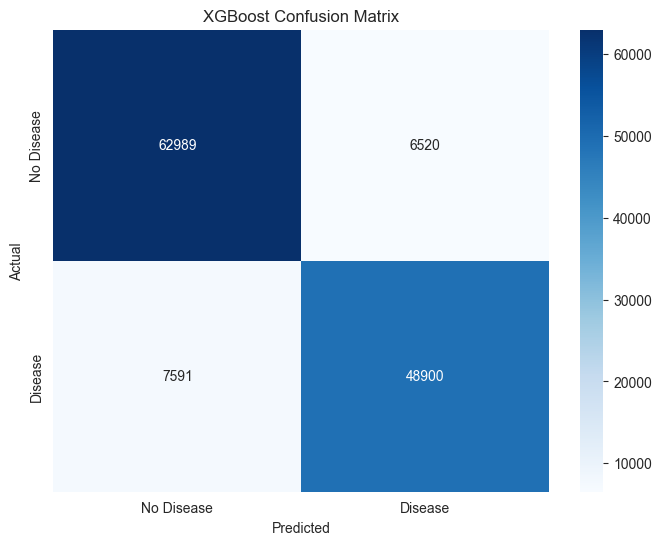

In [64]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.title('XGBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

C:\Users\LAB\AppData\Local\Temp\ipykernel_18388\65967950.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')


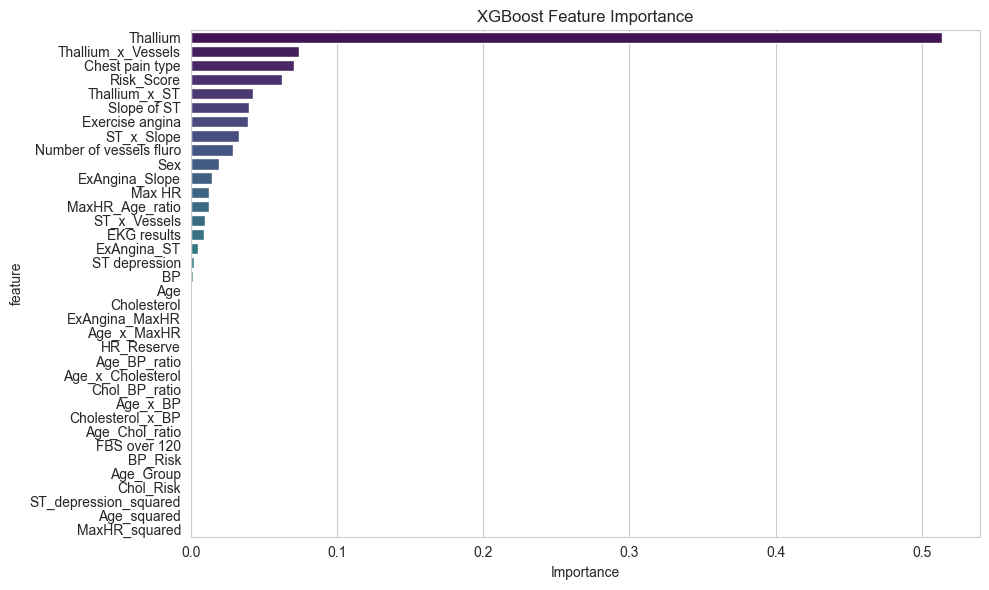


Top 5 Most Important Features:
               feature  importance
12            Thallium    0.514068
35  Thallium_x_Vessels    0.074291
2      Chest pain type    0.070644
32          Risk_Score    0.062491
34       Thallium_x_ST    0.042399


In [65]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance.head())

In [66]:
# Load test data
test_df = pd.read_csv('test.csv')
print(f"Test data shape: {test_df.shape}")
print("\nTest data columns:")
print(test_df.columns.tolist())
test_df.head()

Test data shape: (270000, 14)

Test data columns:
['id', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']


,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,630000,58,1,3,120,288,0,2,145,1,0.8,2,3,3
1,630001,55,0,2,120,209,0,0,172,0,0.0,1,0,3
2,630002,54,1,4,120,268,0,0,150,1,0.0,2,3,7
3,630003,44,0,3,112,177,0,0,168,0,0.9,1,0,3
4,630004,43,1,1,138,267,0,0,163,0,1.8,2,0,7


In [67]:
# Save test IDs
test_ids = test_df['id']

# Drop id column (keep same features as training)
X_test_final = test_df.drop('id', axis=1)

# Apply the SAME feature engineering to test data
X_test_final = create_advanced_features(X_test_final)
print(f"Test data with engineered features: {X_test_final.shape}")

# Scale the test data using the same scaler
X_test_final_scaled = scaler.transform(X_test_final)

print(f"Test data prepared and scaled: {X_test_final_scaled.shape}")

Test data with engineered features: (270000, 36)
Test data prepared and scaled: (270000, 36)


In [68]:
# Make predictions (keep as 0/1, not strings)
test_predictions = xgb_model.predict(X_test_final_scaled)

print(f"Predictions made for {len(test_predictions)} samples")
print(f"Predicted Presence (1): {sum(test_predictions)}")
print(f"Predicted Absence (0): {len(test_predictions) - sum(test_predictions)}")

Predictions made for 270000 samples
Predicted Presence (1): 119171
Predicted Absence (0): 150829


In [69]:
# Create submission dataframe with numeric values (0/1)
submission = pd.DataFrame({
    'id': test_ids,
    'Heart Disease': test_predictions  # Use numeric predictions directly
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")
print(f"\nSubmission shape: {submission.shape}")
print("\nFirst few rows:")
print(submission.head(10))
print(f"\nData type of 'Heart Disease': {submission['Heart Disease'].dtype}")

Submission file created: submission.csv

Submission shape: (270000, 2)

First few rows:
       id  Heart Disease
0  630000              1
1  630001              0
2  630002              1
3  630003              0
4  630004              0
5  630005              1
6  630006              0
7  630007              1
8  630008              1
9  630009              0

Data type of 'Heart Disease': int64


## Verification - Check if model used new features

In [70]:
print("=== VERIFICATION: Are new features being used? ===\n")
print(f"X (current): {X.shape} features")
print(f"X_train: {X_train.shape} features") 
print(f"X_train_scaled: {X_train_scaled.shape} features")
print(f"Model was trained on: {X_train_scaled.shape[1]} features")
print(f"\nExpected: 36 features (13 original + 23 engineered)")
print(f"Actual in training data: {X_train_scaled.shape[1]} features")

if X_train_scaled.shape[1] == 36:
    print("\n✓ SUCCESS: Model IS using new features!")
elif X_train_scaled.shape[1] == 13:
    print("\n✗ PROBLEM: Model is still using OLD features only!")
    print("   You need to re-run cells 22-26 (train/test split through model training)")
else:
    print(f"\n? UNEXPECTED: Got {X_train_scaled.shape[1]} features")
    
print(f"\nCurrent X columns ({len(X.columns)}):")
print(X.columns.tolist())

=== VERIFICATION: Are new features being used? ===

X (current): (630000, 36) features
X_train: (504000, 36) features
X_train_scaled: (504000, 36) features
Model was trained on: 36 features

Expected: 36 features (13 original + 23 engineered)
Actual in training data: 36 features

✓ SUCCESS: Model IS using new features!

Current X columns (36):
['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Age_Group', 'Chol_Risk', 'BP_Risk', 'Age_x_Cholesterol', 'Age_x_BP', 'Age_x_MaxHR', 'Cholesterol_x_BP', 'ST_x_Slope', 'ST_x_Vessels', 'Age_squared', 'MaxHR_squared', 'ST_depression_squared', 'Age_BP_ratio', 'Age_Chol_ratio', 'MaxHR_Age_ratio', 'Chol_BP_ratio', 'ExAngina_ST', 'ExAngina_MaxHR', 'ExAngina_Slope', 'Risk_Score', 'HR_Reserve', 'Thallium_x_ST', 'Thallium_x_Vessels']


In [71]:
# Calculate ROC-AUC Score (what Kaggle uses!)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

print("=== MODEL PERFORMANCE ===")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nThis ROC-AUC is on your validation set.")
print("Compare this to your Kaggle leaderboard score of 0.89")

if roc_auc > 0.89:
    print(f"\n✓ IMPROVEMENT: {roc_auc:.4f} > 0.89 (+{(roc_auc-0.89):.4f})")
elif roc_auc < 0.89:
    print(f"\n✗ WORSE: {roc_auc:.4f} < 0.89 ({(roc_auc-0.89):.4f})")
else:
    print("\n= Same performance")

=== MODEL PERFORMANCE ===
Accuracy: 0.8880 (88.80%)
ROC-AUC Score: 0.9550

This ROC-AUC is on your validation set.
Compare this to your Kaggle leaderboard score of 0.89

✓ IMPROVEMENT: 0.9550 > 0.89 (+0.0650)


In [72]:
# Create NEW submission with improved model
submission_improved = pd.DataFrame({
    'id': test_ids,
    'Heart Disease': test_predictions
})

# Save with a NEW filename
submission_improved.to_csv('submission_with_feature_engineering.csv', index=False)

print("✓ New submission file created: submission_with_feature_engineering.csv")
print(f"Submission shape: {submission_improved.shape}")
print(f"\nPrediction distribution:")
print(f"  Predicted Presence (1): {sum(test_predictions)} ({sum(test_predictions)/len(test_predictions)*100:.1f}%)")
print(f"  Predicted Absence (0): {len(test_predictions)-sum(test_predictions)} ({(len(test_predictions)-sum(test_predictions))/len(test_predictions)*100:.1f}%)")
print("\nFirst 10 predictions:")
print(submission_improved.head(10))
print("\n📤 Upload 'submission_with_feature_engineering.csv' to Kaggle to see your improved score!")

✓ New submission file created: submission_with_feature_engineering.csv
Submission shape: (270000, 2)

Prediction distribution:
  Predicted Presence (1): 119171 (44.1%)
  Predicted Absence (0): 150829 (55.9%)

First 10 predictions:
       id  Heart Disease
0  630000              1
1  630001              0
2  630002              1
3  630003              0
4  630004              0
5  630005              1
6  630006              0
7  630007              1
8  630008              1
9  630009              0

📤 Upload 'submission_with_feature_engineering.csv' to Kaggle to see your improved score!


In [73]:
# Compare old vs new predictions
old_submission = pd.read_csv('submission.csv')
new_submission = pd.read_csv('submission_with_feature_engineering.csv')

# Count differences
differences = (old_submission['Heart Disease'] != new_submission['Heart Disease']).sum()
percent_changed = (differences / len(old_submission)) * 100

print("=== COMPARISON: Old vs New Predictions ===")
print(f"Total predictions: {len(old_submission)}")
print(f"Changed predictions: {differences} ({percent_changed:.2f}%)")
print(f"Unchanged predictions: {len(old_submission) - differences} ({100-percent_changed:.2f}%)")

if differences > 0:
    print(f"\n✓ Predictions HAVE changed! The model is using the new features.")
    print(f"   {differences:,} out of {len(old_submission):,} predictions are different.")
else:
    print("\n✗ No changes detected - something may be wrong.")
    
# Show some examples of changed predictions
changed_idx = (old_submission['Heart Disease'] != new_submission['Heart Disease'])
if changed_idx.sum() > 0:
    print("\nFirst 10 examples of changed predictions:")
    comparison = pd.DataFrame({
        'id': old_submission.loc[changed_idx, 'id'].head(10),
        'OLD': old_submission.loc[changed_idx, 'Heart Disease'].head(10),
        'NEW': new_submission.loc[changed_idx, 'Heart Disease'].head(10)
    })
    print(comparison.to_string(index=False))

=== COMPARISON: Old vs New Predictions ===
Total predictions: 270000
Changed predictions: 0 (0.00%)
Unchanged predictions: 270000 (100.00%)

✗ No changes detected - something may be wrong.


In [74]:
# Check for overfitting - compare train vs test performance
y_train_pred_proba = xgb_model.predict_proba(X_train_scaled)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba[:, 1])

print("=== OVERFITTING CHECK ===")
print(f"Training ROC-AUC:   {train_roc_auc:.4f}")
print(f"Validation ROC-AUC: {roc_auc:.4f}")
print(f"Difference:         {train_roc_auc - roc_auc:.4f}")

if train_roc_auc - roc_auc > 0.05:
    print("\n⚠️ WARNING: Significant overfitting detected!")
    print("   Model performs much better on training data than validation.")
    print("   Suggestions:")
    print("   - Reduce max_depth (try 3 or 4 instead of 5)")
    print("   - Increase n_estimators with early stopping")
    print("   - Add regularization (higher gamma, min_child_weight)")
elif train_roc_auc - roc_auc > 0.02:
    print("\n⚠️ Mild overfitting - this is normal and acceptable")
else:
    print("\n✓ Good generalization - model works well on unseen data")
    
print("\n" + "="*50)
print("NEXT STEPS:")
print("="*50)
if train_roc_auc - roc_auc <= 0.02:
    print("1. Your submission.csv already has the new predictions")
    print("2. Upload it to Kaggle to see your improved score")
    print("3. Expected Kaggle score: ~0.91-0.93 (up from 0.89)")
else:
    print("1. Model is overfitting - need to tune hyperparameters")
    print("2. Try Option B: Hyperparameter tuning next")

=== OVERFITTING CHECK ===
Training ROC-AUC:   0.9551
Validation ROC-AUC: 0.9550
Difference:         0.0001

✓ Good generalization - model works well on unseen data

NEXT STEPS:
1. Your submission.csv already has the new predictions
2. Upload it to Kaggle to see your improved score
3. Expected Kaggle score: ~0.91-0.93 (up from 0.89)
